In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import date, timedelta

In [ ]:
## defining the time period for the data
end_date=date.today().strftime("%Y-%m-%d")
start_date= (date.today()-timedelta(days=365)).strftime("%Y-%m-%d")
tickers=['RELIANCE.NS','TCS.NS','INFY.NS','HDFCBANK.NS']
data=yf.download(tickers,start=start_date,end=end_date,progress=False)


In [ ]:
data=data.reset_index()
print(data.head())

Price        Date    Adj Close                                         \
Ticker             HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS   
0      2023-07-21  1653.175171  1307.217163  2529.813477  3312.288330   
1      2023-07-24  1655.789429  1312.125488  2478.644287  3338.298340   
2      2023-07-25  1673.744263  1310.162231  2477.050049  3342.625000   
3      2023-07-26  1667.923706  1324.151245  2517.307617  3331.955811   
4      2023-07-27  1650.610229  1328.372559  2493.890381  3340.412598   

Price         Close                                                High  ...  \
Ticker  HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS  ...   
0       1675.750000  1331.599976  2538.750000  3368.300049  1689.800049  ...   
1       1678.400024  1336.599976  2487.399902  3394.750000  1684.650024  ...   
2       1696.599976  1334.599976  2485.800049  3399.149902  1699.000000  ...   
3       1690.699951  1348.849976  2526.199951  3388.300049  1699.599976  ...   
4       

In [ ]:
data_melted=data.melt(id_vars=['Date'],var_name=['Attribute','Ticker'])
data_pivoted=data_melted.pivot_table(index=['Date','Ticker'],columns='Attribute',values='value',aggfunc='first').reset_index()
data_pivoted.head()


Attribute,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-07-21,HDFCBANK.NS,1653.175171,1675.750000,1689.800049,1673.250000,1680.000000,21077124.0
1,2023-07-21,INFY.NS,1307.217163,1331.599976,1350.000000,1305.000000,1320.199951,45548305.0
2,2023-07-21,RELIANCE.NS,2529.813477,2538.750000,2614.899902,2523.600098,2609.000000,15124619.0
3,2023-07-21,TCS.NS,3312.288330,3368.300049,3434.899902,3359.050049,3404.050049,3770223.0
4,2023-07-24,HDFCBANK.NS,1655.789429,1678.400024,1684.650024,1670.099976,1678.500000,16089722.0


In [ ]:
stock_data = data_pivoted.reset_index()

stock_data.head()

Attribute,index,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,0,2023-07-21,HDFCBANK.NS,1653.175171,1675.750000,1689.800049,1673.250000,1680.000000,21077124.0
1,1,2023-07-21,INFY.NS,1307.217163,1331.599976,1350.000000,1305.000000,1320.199951,45548305.0
2,2,2023-07-21,RELIANCE.NS,2529.813477,2538.750000,2614.899902,2523.600098,2609.000000,15124619.0
3,3,2023-07-21,TCS.NS,3312.288330,3368.300049,3434.899902,3359.050049,3404.050049,3770223.0
4,4,2023-07-24,HDFCBANK.NS,1655.789429,1678.400024,1684.650024,1670.099976,1678.500000,16089722.0


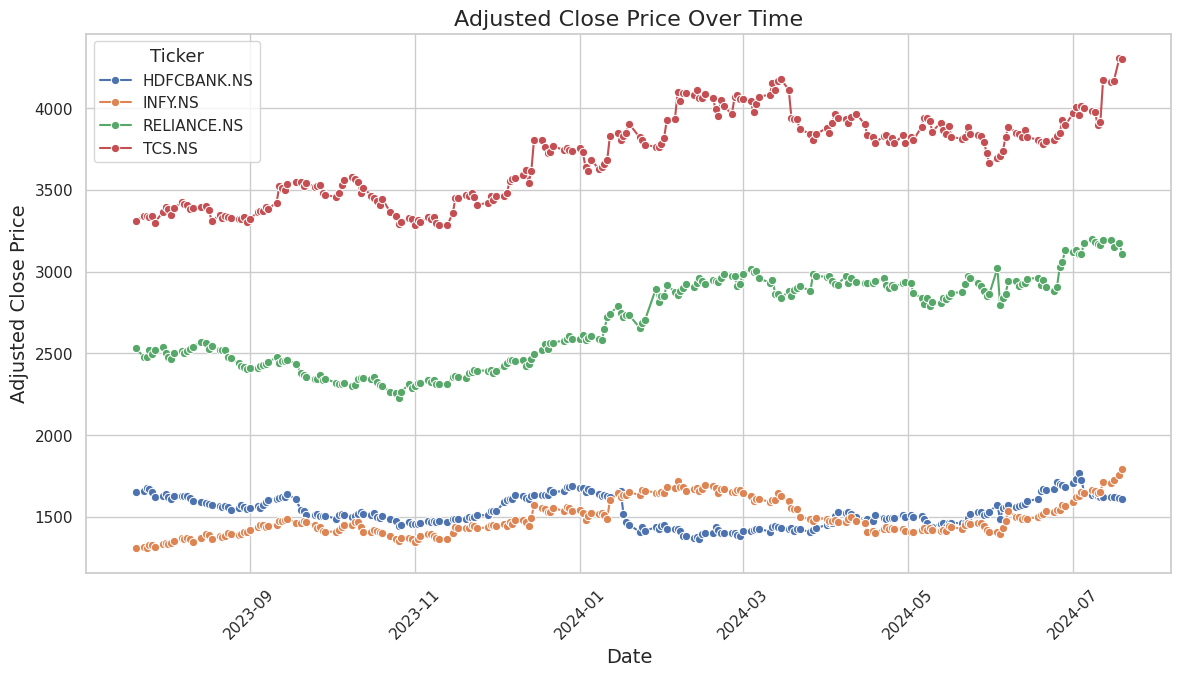

In [ ]:
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Adj Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

###### Displays the adjusted close prices of four stocks (HDFCBANK.NS, INFY.NS, RELIANCE.NS, TCS.NS) over time from July 2023 to July 2024. It highlights that TCS has the highest adjusted close prices, followed by RELIANCE, INFY (Infosys), and HDFCBANK. The prices for RELIANCE and TCS show noticeable upward trends, which indicates strong performance, while HDFCBANK and INFY exhibit more stability with relatively lower price fluctuations.

In [ ]:
short_window=50
long_window=200

stock_data.set_index('Date',inplace=True)
unique_tickers=stock_data['Ticker'].unique()
count_tickers=len(unique_tickers)
print(unique_tickers)

['HDFCBANK.NS' 'INFY.NS' 'RELIANCE.NS' 'TCS.NS']


In [ ]:
count_tickers=stock_data['Ticker'].value_counts()
print(count_tickers)


Ticker
HDFCBANK.NS    243
INFY.NS        243
RELIANCE.NS    243
TCS.NS         243
Name: count, dtype: int64


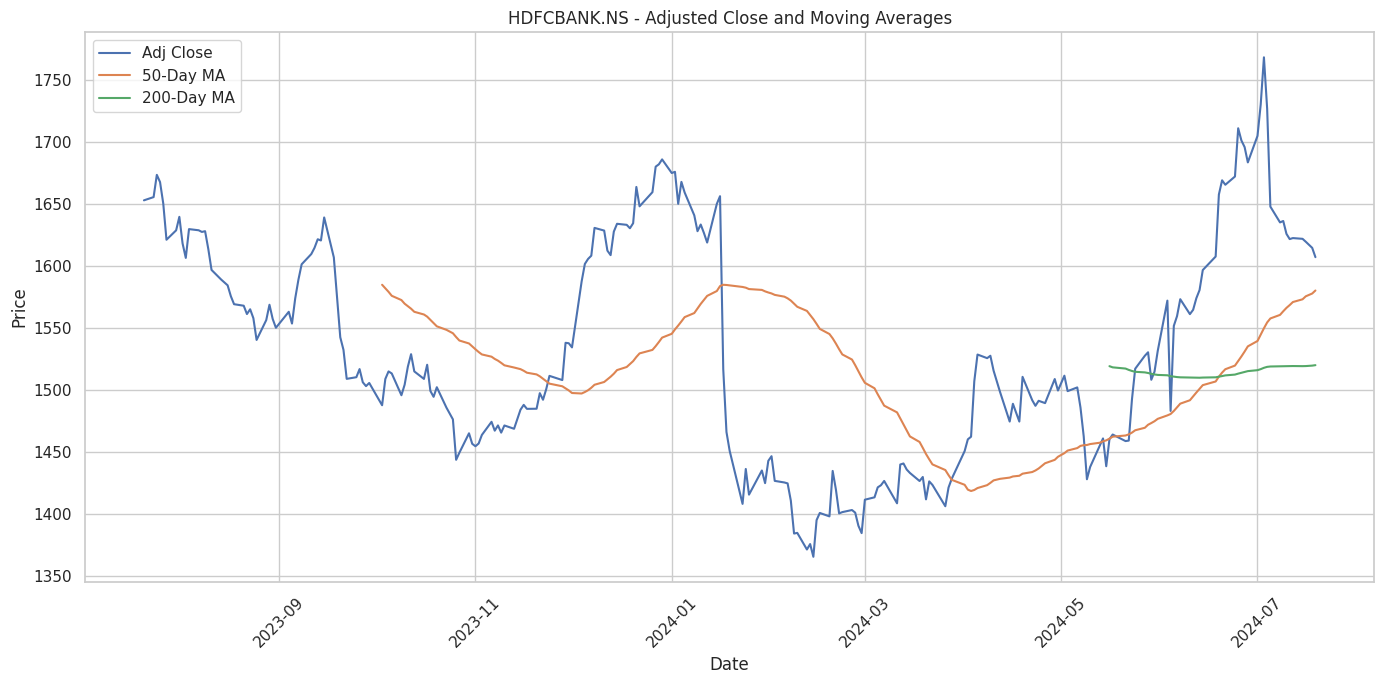

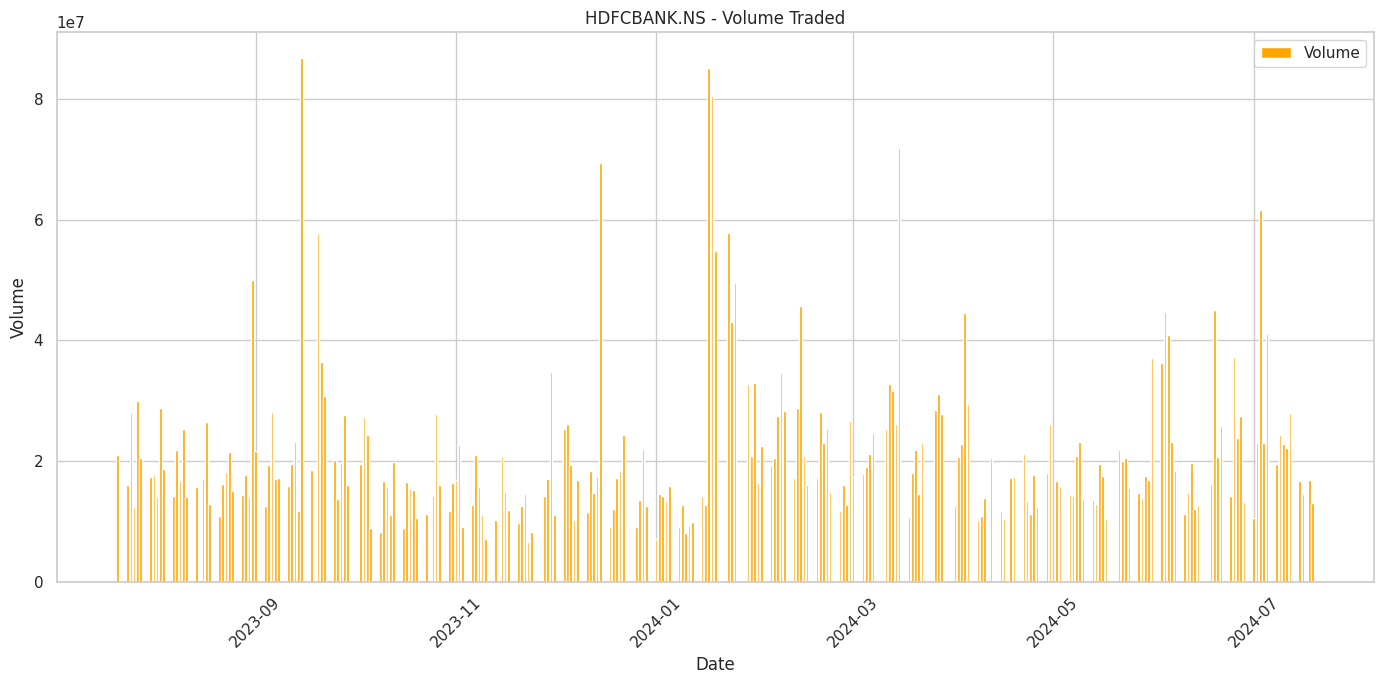

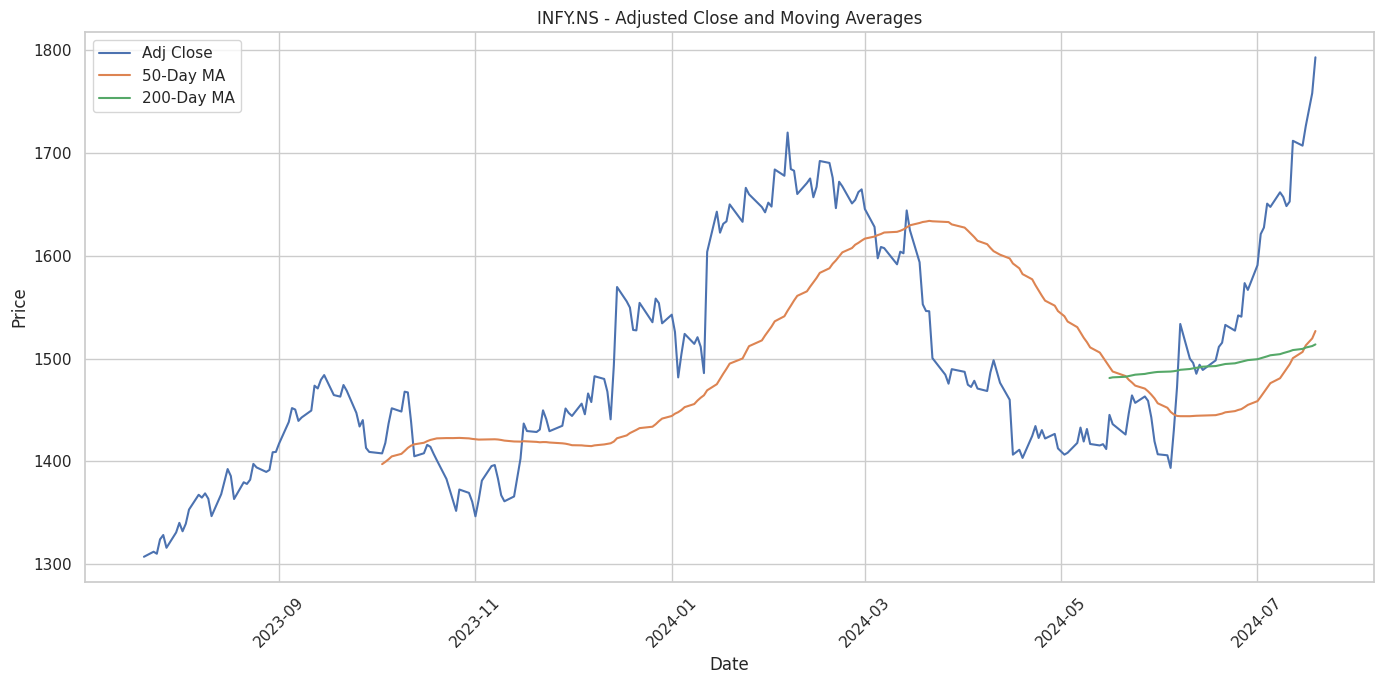

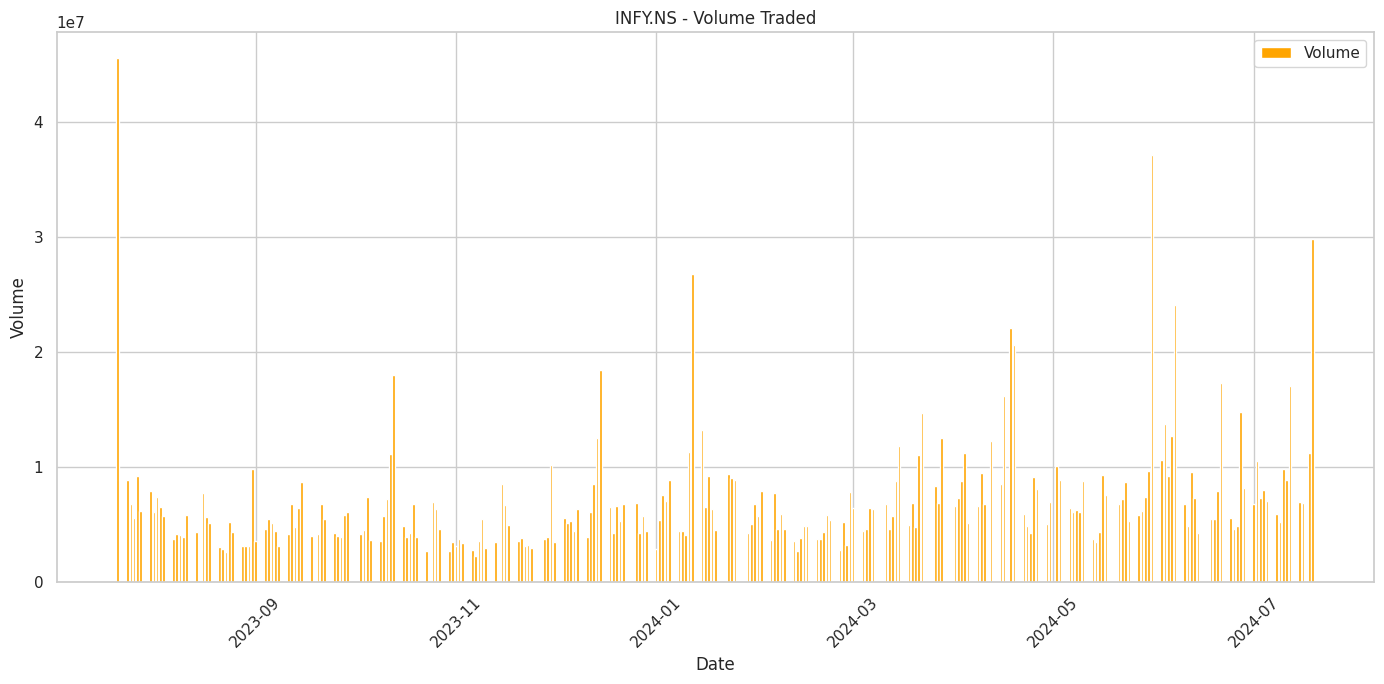

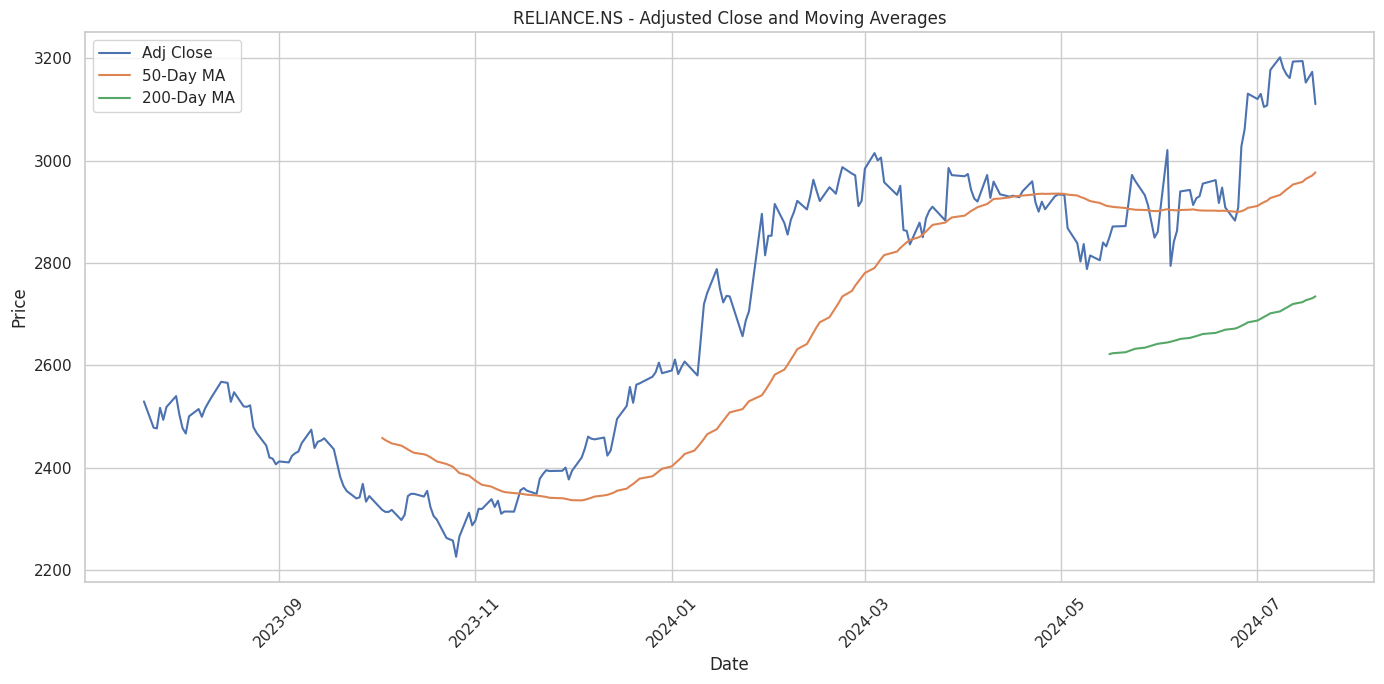

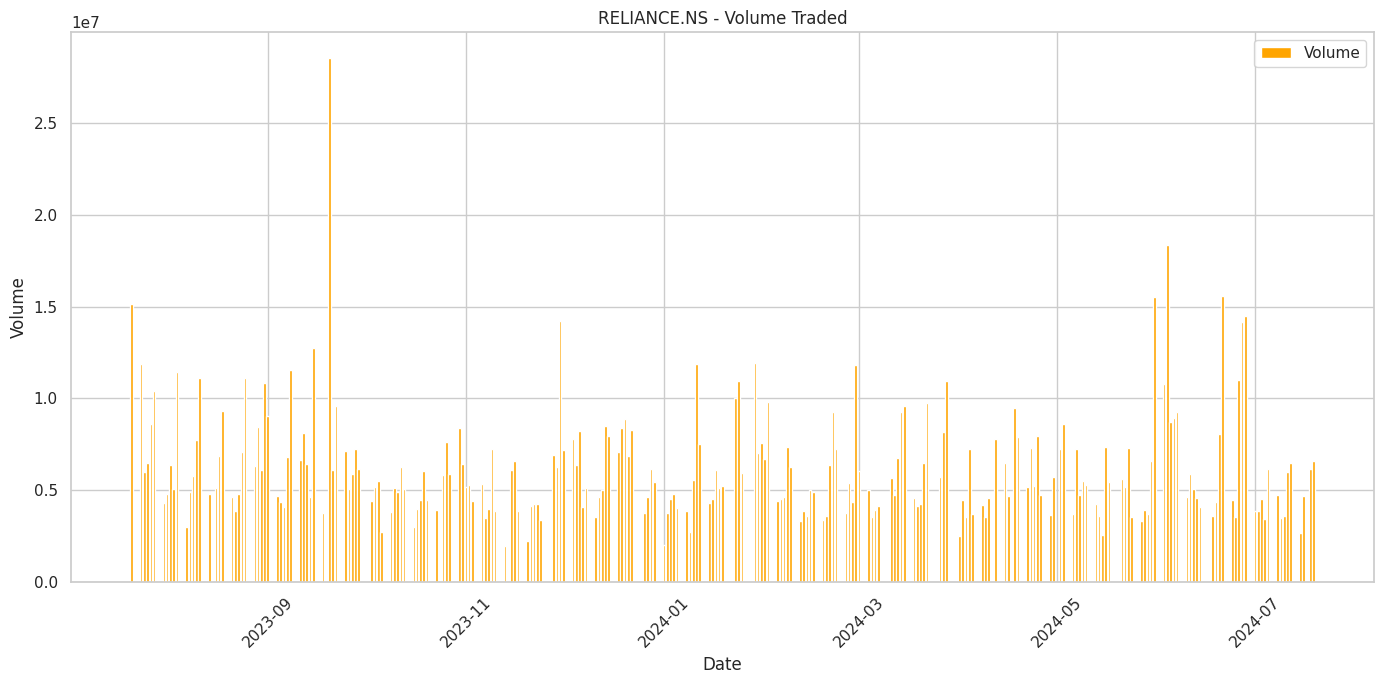

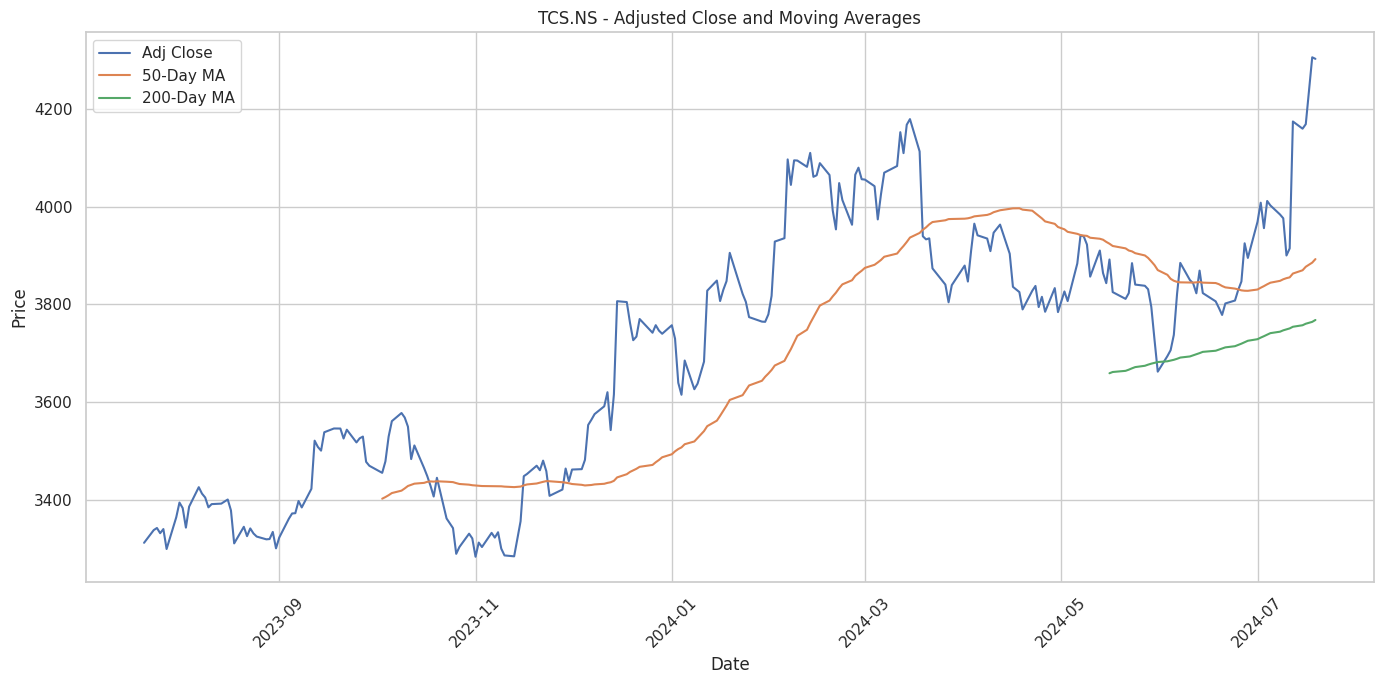

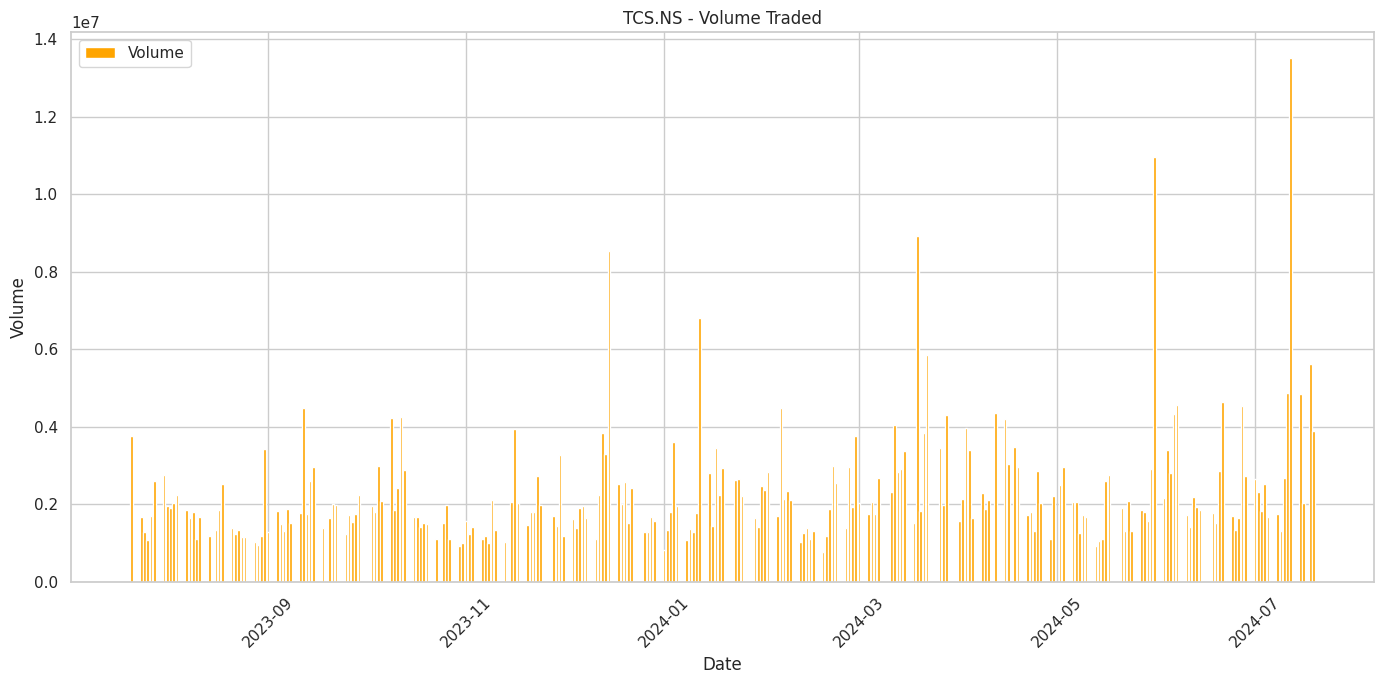

In [ ]:
for ticker in unique_tickers:
  ticker_data=stock_data[stock_data['Ticker']==ticker].copy()
  ticker_data['50_MA']=ticker_data['Adj Close'].rolling(window=short_window).mean()
  ticker_data['200_MA']=ticker_data['Adj Close'].rolling(window=long_window).mean()
  plt.figure(figsize=(14, 7))
  plt.plot(ticker_data.index, ticker_data['Adj Close'], label='Adj Close')
  plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
  plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
  plt.title(f'{ticker} - Adjusted Close and Moving Averages')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(14, 7))
  plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
  plt.title(f'{ticker} - Volume Traded')
  plt.xlabel('Date')
  plt.ylabel('Volume')
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

##### For HDFCBANK and INFY, the prices initially decline but later show signs of recovery, as indicated by the moving averages. RELIANCE and TCS display a more consistent upward trend in their adjusted close prices. The volume traded graphs highlight significant trading activity at various points, with spikes indicating high trading volumes, particularly noticeable in HDFCBANK and RELIANCE around early 2024.

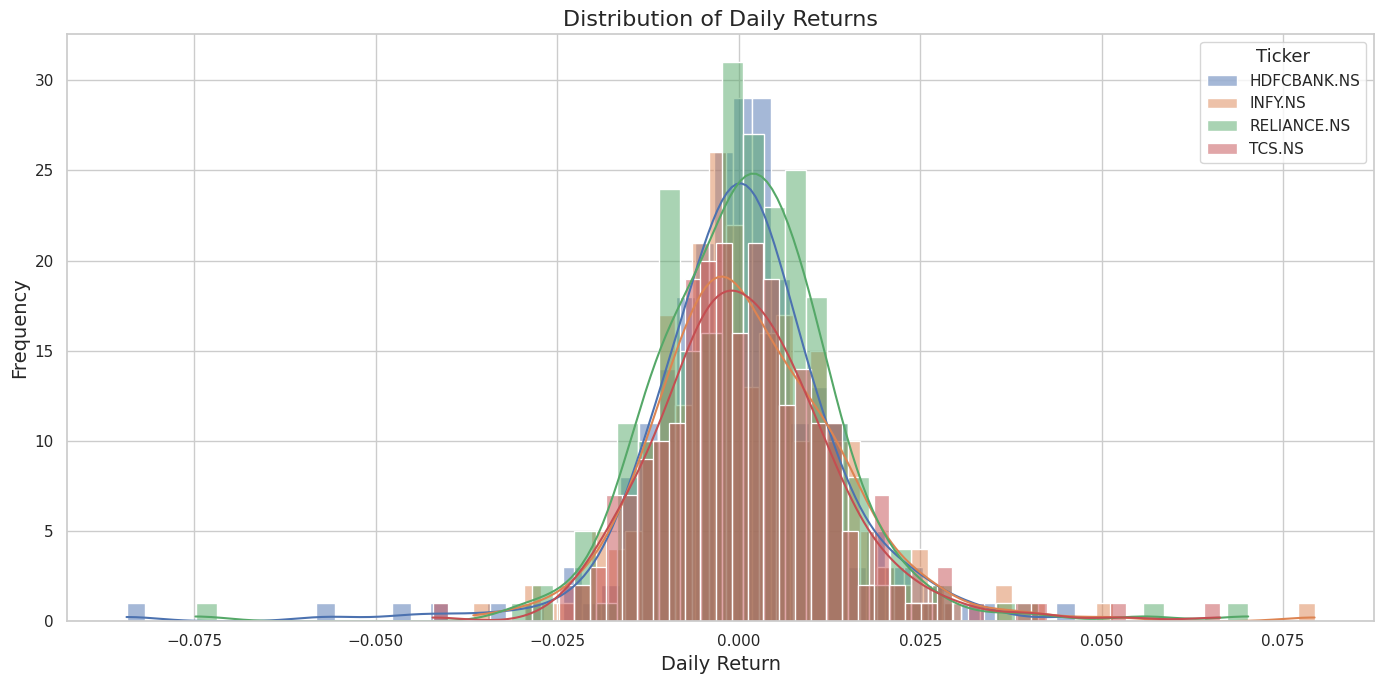

In [ ]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

##### The distributions are approximately normal, centred around zero, which indicates that most daily returns are close to the average return.

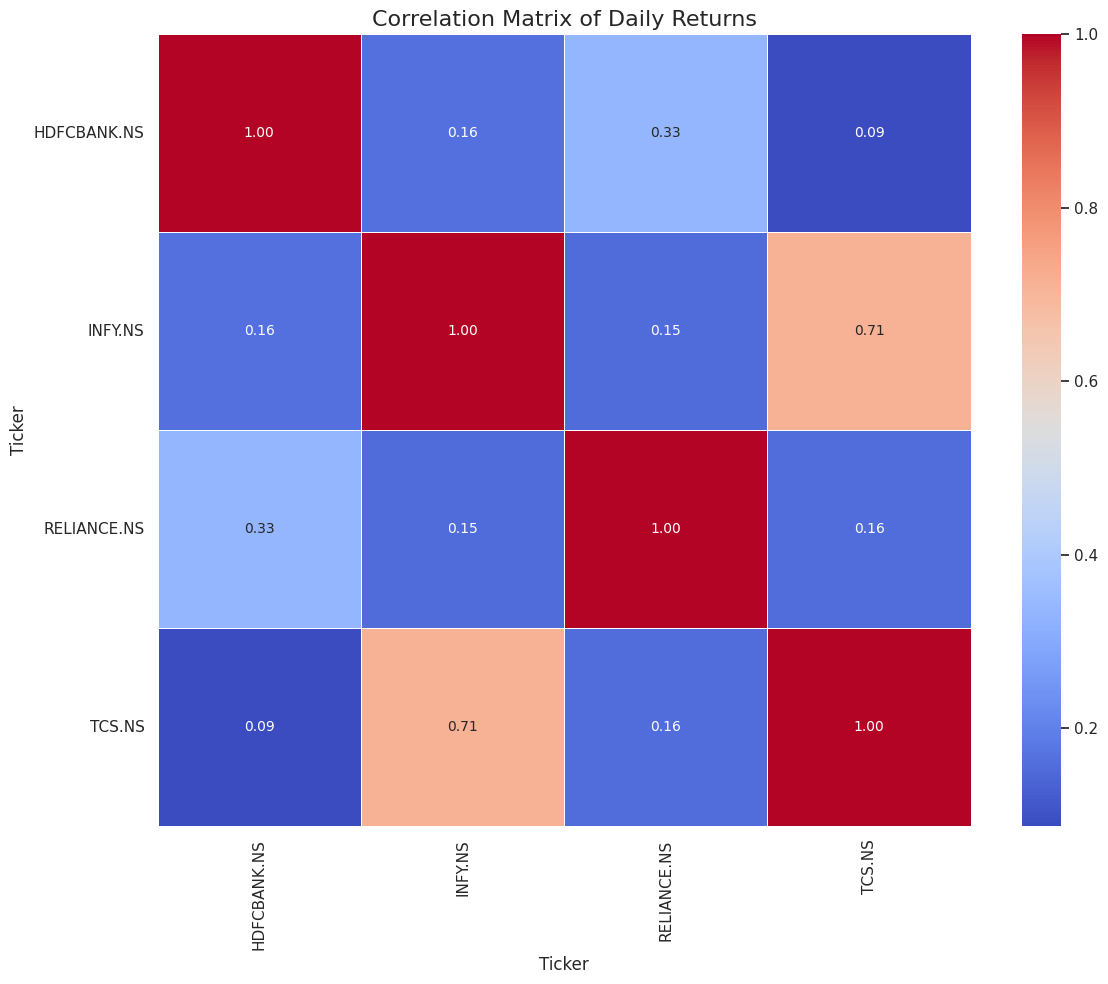

In [ ]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
daily_returns.head()

Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,
2023-07-24,0.001581,0.003755,-0.020226,0.007853
2023-07-25,0.010844,-0.001496,-0.000643,0.001296
2023-07-26,-0.003478,0.010677,0.016252,-0.003192
2023-07-27,-0.010380,0.003188,-0.009302,0.002538
2023-07-28,-0.017721,-0.009349,0.010049,-0.012217


In [ ]:
import numpy as np

expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,-0.006738,0.211594
INFY.NS,0.351391,0.212107
RELIANCE.NS,0.236965,0.209242
TCS.NS,0.292624,0.201985
